In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

In [2]:
def gen_sp(length, sp_time, before, after):
    return np.concatenate((np.random.normal(*before, sp_time), np.random.normal(*after,length-sp_time))), np.arange(0,length)

In [3]:
y, x = gen_sp(100, 50, (10,5), (20,5))

In [6]:
with pm.Model() as sp_model_half:

    sigma = pm.HalfCauchy("sigma", beta=2)

    switchpoint = pm.DiscreteUniform("switchpoint", lower=0, upper=100)

    mu1 = pm.HalfNormal("mu1", sigma=10)
    mu2 = pm.HalfNormal("mu2", sigma=10)

    intercept = pm.math.switch(switchpoint < x, mu1, mu2)

    likelihood = pm.Normal("y", mu=intercept, sigma=sigma, observed=y)

    trace = pm.sample()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f811e705450>,
      dtype=object)

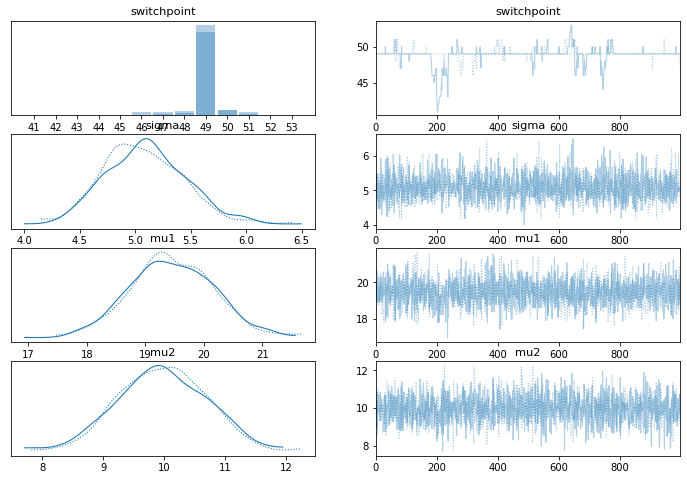

In [7]:
az.plot_trace(trace)

(array([0.01333333, 0.01166667, 0.00833333, 0.00666667, 0.06666667,
        0.16333333, 1.17166667, 0.13166667, 0.05833333, 0.035     ]),
 array([45. , 45.6, 46.2, 46.8, 47.4, 48. , 48.6, 49.2, 49.8, 50.4, 51. ]),
 <a list of 10 Patch objects>)

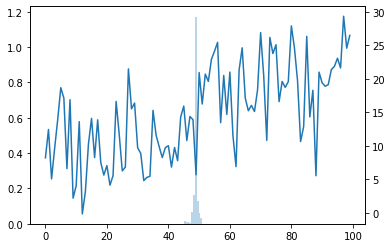

In [8]:
fig, ax = plt.subplots(1,1)
ax2 = ax.twinx()
ax2.plot(y)
ax.hist(trace["posterior"]["switchpoint"].values.mean(axis=0), density=True, alpha=0.3)